In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

2024-08-13 18:33:40.199580: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
data_train_path = "/Users/tassnymechchahed/Desktop/Fruit Dataset/train"
data_test_path = "/Users/tassnymechchahed/Desktop/Fruit Dataset/test"
data_validation_path = "/Users/tassnymechchahed/Desktop/Fruit Dataset/validation"

In [6]:
# Dimension image
img_width = 180
img_height = 180

In [7]:
# Transform images into numpy array
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False)
    

Found 3115 files belonging to 36 classes.


In [11]:
data_cat = data_train.class_names

In [12]:
data_validation = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle = False,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False)

Found 351 files belonging to 36 classes.


In [13]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False)

Found 359 files belonging to 36 classes.


2024-08-13 19:24:12.490688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3115]
	 [[{{node Placeholder/_4}}]]
2024-08-13 19:24:12.491503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3115]
	 [[{{node Placeholder/_4}}]]
2024-08-13 19:24:13.283887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:24:13.551535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


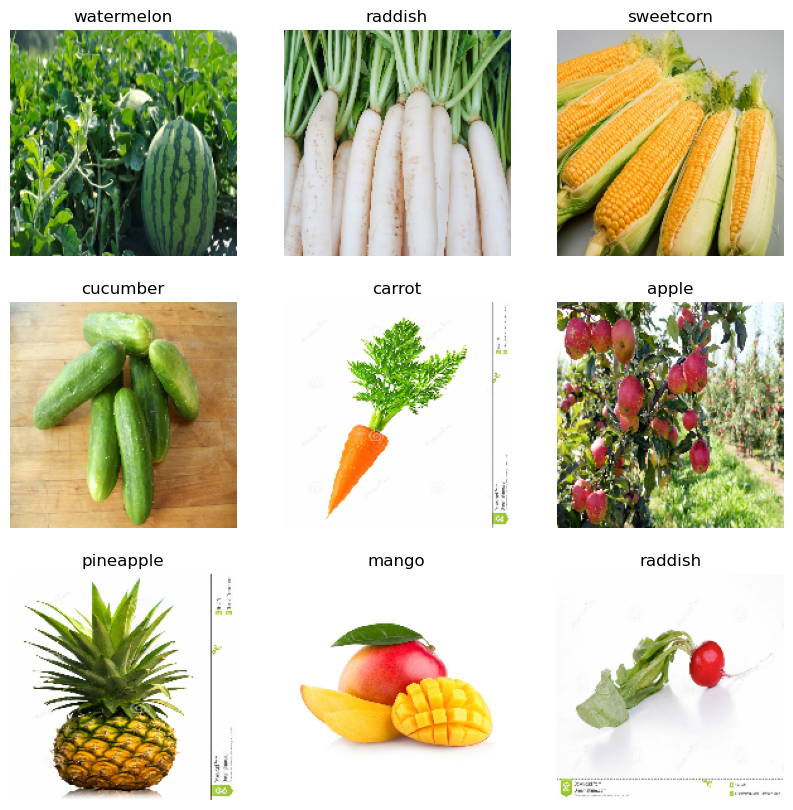

In [20]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')
    

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
data_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
# Build model
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(units = len(data_cat))
])
    
    

In [28]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics= ['accuracy'])

In [30]:
epochs_size = 25
history = model.fit(data_train, validation_data = data_validation, epochs = epochs_size)

Epoch 1/25


2024-08-13 19:43:00.952172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3115]
	 [[{{node Placeholder/_0}}]]
2024-08-13 19:43:00.952738: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3115]
	 [[{{node Placeholder/_0}}]]
2024-08-13 19:43:02.217366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:43:02.482937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 38s - loss: 5.6512 - accuracy: 0.0729

2024-08-13 19:43:04.697624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 36s - loss: 4.9713 - accuracy: 0.0562

2024-08-13 19:43:05.701710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 27s - loss: 4.0442 - accuracy: 0.0670

2024-08-13 19:43:08.300060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 22s - loss: 3.8106 - accuracy: 0.0690

2024-08-13 19:43:10.989224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 21s - loss: 3.7620 - accuracy: 0.0670

2024-08-13 19:43:12.149296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 19s - loss: 3.7090 - accuracy: 0.0654

2024-08-13 19:43:13.382931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 19s - loss: 3.6873 - accuracy: 0.0671

2024-08-13 19:43:13.995435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:43:14.002079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 18s - loss: 3.6505 - accuracy: 0.0709

2024-08-13 19:43:14.627259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 17s - loss: 3.6340 - accuracy: 0.0695

2024-08-13 19:43:15.666539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 16s - loss: 3.5967 - accuracy: 0.0763

2024-08-13 19:43:16.619651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 15s - loss: 3.5733 - accuracy: 0.0778

2024-08-13 19:43:17.324076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 13s - loss: 3.5081 - accuracy: 0.0814

2024-08-13 19:43:19.308619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 12s - loss: 3.4801 - accuracy: 0.0831

2024-08-13 19:43:20.353163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 12s - loss: 3.4750 - accuracy: 0.0839

2024-08-13 19:43:20.643865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 11s - loss: 3.4645 - accuracy: 0.0837

2024-08-13 19:43:21.145783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 7s - loss: 3.3718 - accuracy: 0.0995

2024-08-13 19:43:24.337412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


78/98 [======================>.......] - ETA: 5s - loss: 3.3272 - accuracy: 0.1070

2024-08-13 19:43:26.379641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:43:26.536012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 5s - loss: 3.3194 - accuracy: 0.1059

2024-08-13 19:43:27.160656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


87/98 [=========================>....] - ETA: 3s - loss: 3.2723 - accuracy: 0.1135

2024-08-13 19:43:28.874517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 3.2207 - accuracy: 0.1252

2024-08-13 19:43:31.028569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [351]
	 [[{{node Placeholder/_4}}]]
2024-08-13 19:43:31.028803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [351]
	 [[{{node Placeholder/_4}}]]
2024-08-13 19:43:32.672708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:43:33.242664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 33s 312ms/step - loss: 3.2207 - accuracy: 0.1252 - val_loss: 2.2105 - val_accuracy: 0.3675
Epoch 2/25


2024-08-13 19:43:35.104941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:43:35.372244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 38s - loss: 2.5318 - accuracy: 0.3229

2024-08-13 19:43:37.550881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 37s - loss: 2.5178 - accuracy: 0.3125

2024-08-13 19:43:38.495757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 26s - loss: 2.5598 - accuracy: 0.2656

2024-08-13 19:43:41.147673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 22s - loss: 2.5579 - accuracy: 0.2630

2024-08-13 19:43:43.782311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 21s - loss: 2.5259 - accuracy: 0.2801

2024-08-13 19:43:44.981803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 19s - loss: 2.5336 - accuracy: 0.2891

2024-08-13 19:43:46.193983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 19s - loss: 2.5178 - accuracy: 0.2877

2024-08-13 19:43:46.894325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:43:46.901726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 18s - loss: 2.4986 - accuracy: 0.2960

2024-08-13 19:43:47.534195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 17s - loss: 2.4925 - accuracy: 0.2997

2024-08-13 19:43:48.452393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 16s - loss: 2.4834 - accuracy: 0.3023

2024-08-13 19:43:49.542072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 15s - loss: 2.4777 - accuracy: 0.3014

2024-08-13 19:43:50.259804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 13s - loss: 2.4556 - accuracy: 0.3065

2024-08-13 19:43:52.219290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 12s - loss: 2.4592 - accuracy: 0.3047

2024-08-13 19:43:53.353164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 12s - loss: 2.4583 - accuracy: 0.3048

2024-08-13 19:43:53.665252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 11s - loss: 2.4405 - accuracy: 0.3093

2024-08-13 19:43:54.166795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 2.4021 - accuracy: 0.3187

2024-08-13 19:43:57.577162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 5s - loss: 2.3795 - accuracy: 0.3216

2024-08-13 19:43:59.862851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:44:00.029020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 5s - loss: 2.3726 - accuracy: 0.3229

2024-08-13 19:44:00.651757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 2s - loss: 2.3539 - accuracy: 0.3271

2024-08-13 19:44:02.441739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 2.3385 - accuracy: 0.3310

2024-08-13 19:44:06.170485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:44:06.727757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 34s 320ms/step - loss: 2.3385 - accuracy: 0.3310 - val_loss: 1.4231 - val_accuracy: 0.6268
Epoch 3/25


2024-08-13 19:44:08.626484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:44:08.892627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 37s - loss: 1.8666 - accuracy: 0.4792

2024-08-13 19:44:11.035240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 35s - loss: 1.8526 - accuracy: 0.4875

2024-08-13 19:44:12.002170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 27s - loss: 1.9578 - accuracy: 0.4286

2024-08-13 19:44:14.664143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 22s - loss: 1.9539 - accuracy: 0.4310

2024-08-13 19:44:17.420546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 21s - loss: 1.9734 - accuracy: 0.4330

2024-08-13 19:44:18.642956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 19s - loss: 1.9642 - accuracy: 0.4451

2024-08-13 19:44:20.057831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 19s - loss: 1.9626 - accuracy: 0.4473

2024-08-13 19:44:20.731921: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:44:20.736826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 18s - loss: 1.9576 - accuracy: 0.4510

2024-08-13 19:44:21.370845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 17s - loss: 1.9600 - accuracy: 0.4508

2024-08-13 19:44:22.282279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 16s - loss: 1.9606 - accuracy: 0.4484

2024-08-13 19:44:23.272302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 16s - loss: 1.9496 - accuracy: 0.4493

2024-08-13 19:44:24.013112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 13s - loss: 1.9207 - accuracy: 0.4540

2024-08-13 19:44:26.348733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 12s - loss: 1.9093 - accuracy: 0.4556

2024-08-13 19:44:27.556941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 12s - loss: 1.9081 - accuracy: 0.4558

2024-08-13 19:44:27.889797: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 11s - loss: 1.9080 - accuracy: 0.4568

2024-08-13 19:44:28.429787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 1.8724 - accuracy: 0.4639

2024-08-13 19:44:31.862550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 5s - loss: 1.8494 - accuracy: 0.4684

2024-08-13 19:44:34.249139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:44:34.408518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 4s - loss: 1.8443 - accuracy: 0.4688

2024-08-13 19:44:35.180789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 1.8417 - accuracy: 0.4705

2024-08-13 19:44:37.103601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 1.8377 - accuracy: 0.4719

2024-08-13 19:45:05.494475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:45:06.082448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 59s 585ms/step - loss: 1.8377 - accuracy: 0.4719 - val_loss: 0.9990 - val_accuracy: 0.7322
Epoch 4/25


2024-08-13 19:45:07.940743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:45:08.206761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 38s - loss: 1.4431 - accuracy: 0.5625

2024-08-13 19:45:10.356754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 2:55:14 - loss: 1.4701 - accuracy: 0.5375

2024-08-13 19:52:42.050917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 49:03 - loss: 1.3939 - accuracy: 0.5848

2024-08-13 19:52:45.389848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 24:35 - loss: 1.4529 - accuracy: 0.5651

2024-08-13 19:52:48.416399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 19:52 - loss: 1.4538 - accuracy: 0.5737

2024-08-13 19:52:49.596876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 15:36 - loss: 1.4347 - accuracy: 0.5833

2024-08-13 19:52:50.859361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 14:15 - loss: 1.4461 - accuracy: 0.5813

2024-08-13 19:52:51.444730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:52:51.447857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 13:03 - loss: 1.4401 - accuracy: 0.5828

2024-08-13 19:52:52.019985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 11:29 - loss: 1.4205 - accuracy: 0.5875

2024-08-13 19:52:52.947923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 10:08 - loss: 1.4074 - accuracy: 0.5908

2024-08-13 19:52:53.881696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 9:19 - loss: 1.4077 - accuracy: 0.5931

2024-08-13 19:52:54.532566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 7:01 - loss: 1.3728 - accuracy: 0.6016

2024-08-13 19:52:56.339690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 5:57 - loss: 1.3844 - accuracy: 0.5965

2024-08-13 19:52:57.449396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:52:57.734969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 5:28 - loss: 1.3933 - accuracy: 0.5954

2024-08-13 19:52:58.196253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 3:11 - loss: 1.3524 - accuracy: 0.6089

2024-08-13 19:53:01.528371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


78/98 [======================>.......] - ETA: 2:03 - loss: 1.3227 - accuracy: 0.6226

2024-08-13 19:53:03.743891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:53:03.885082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 1:48 - loss: 1.3154 - accuracy: 0.6230

2024-08-13 19:53:04.479700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


87/98 [=========================>....] - ETA: 1:00 - loss: 1.2972 - accuracy: 0.6261

2024-08-13 19:53:06.229709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 1.2877 - accuracy: 0.6276

2024-08-13 19:53:09.817964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:53:10.423671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 484s 5s/step - loss: 1.2877 - accuracy: 0.6276 - val_loss: 0.6114 - val_accuracy: 0.8348
Epoch 5/25


2024-08-13 19:53:12.260787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:53:12.524480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 38s - loss: 0.9517 - accuracy: 0.6771

2024-08-13 19:53:14.708240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 37s - loss: 0.9953 - accuracy: 0.7063

2024-08-13 19:53:15.639462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 27s - loss: 1.0300 - accuracy: 0.6964

2024-08-13 19:53:18.380346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 22s - loss: 1.0125 - accuracy: 0.7031

2024-08-13 19:53:21.039275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 21s - loss: 0.9882 - accuracy: 0.7065

2024-08-13 19:53:22.207502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 20s - loss: 1.0054 - accuracy: 0.7031

2024-08-13 19:53:23.445946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/98 [=========>....................] - ETA: 19s - loss: 1.0059 - accuracy: 0.7059

2024-08-13 19:53:24.084549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:53:24.088247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 18s - loss: 1.0149 - accuracy: 0.7031

2024-08-13 19:53:24.711385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 17s - loss: 1.0051 - accuracy: 0.7078

2024-08-13 19:53:25.831589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 16s - loss: 0.9878 - accuracy: 0.7131

2024-08-13 19:53:26.856445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 15s - loss: 0.9724 - accuracy: 0.7188

2024-08-13 19:53:27.577067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 13s - loss: 0.9298 - accuracy: 0.7288

2024-08-13 19:53:29.477017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 12s - loss: 0.9202 - accuracy: 0.7336

2024-08-13 19:53:30.566122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 11s - loss: 0.9156 - accuracy: 0.7349

2024-08-13 19:53:30.877094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 11s - loss: 0.9111 - accuracy: 0.7373

2024-08-13 19:53:31.357000: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 0.8840 - accuracy: 0.7487

2024-08-13 19:53:34.796054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


78/98 [======================>.......] - ETA: 5s - loss: 0.8743 - accuracy: 0.7548

2024-08-13 19:53:37.043849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:53:37.209672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 5s - loss: 0.8648 - accuracy: 0.7577

2024-08-13 19:53:37.831295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


87/98 [=========================>....] - ETA: 3s - loss: 0.8516 - accuracy: 0.7608

2024-08-13 19:53:39.702425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.8371 - accuracy: 0.7640

2024-08-13 19:53:43.380020: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:53:44.011324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 34s 321ms/step - loss: 0.8371 - accuracy: 0.7640 - val_loss: 0.4753 - val_accuracy: 0.8946
Epoch 6/25


2024-08-13 19:53:45.887637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:53:46.151654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 38s - loss: 0.8147 - accuracy: 0.7917

2024-08-13 19:53:48.314785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 36s - loss: 0.6316 - accuracy: 0.8438

2024-08-13 19:53:49.354184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 29s - loss: 0.5509 - accuracy: 0.8438

2024-08-13 19:53:52.267154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 23s - loss: 0.5582 - accuracy: 0.8424

2024-08-13 19:53:55.095534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 22s - loss: 0.5676 - accuracy: 0.8371

2024-08-13 19:53:56.306812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 20s - loss: 0.5566 - accuracy: 0.8352

2024-08-13 19:53:57.608184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 19s - loss: 0.5620 - accuracy: 0.8366

2024-08-13 19:53:58.228654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:53:58.232364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 19s - loss: 0.5479 - accuracy: 0.8421

2024-08-13 19:53:58.862707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 18s - loss: 0.5564 - accuracy: 0.8414

2024-08-13 19:53:59.814213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 17s - loss: 0.5679 - accuracy: 0.8365

2024-08-13 19:54:00.856085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 16s - loss: 0.5649 - accuracy: 0.8370

2024-08-13 19:54:01.575897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 13s - loss: 0.5493 - accuracy: 0.8438

2024-08-13 19:54:03.550193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 12s - loss: 0.5515 - accuracy: 0.8438

2024-08-13 19:54:04.713116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:54:05.027553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 11s - loss: 0.5508 - accuracy: 0.8443

2024-08-13 19:54:05.749067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 0.5412 - accuracy: 0.8473

2024-08-13 19:54:09.215834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 5s - loss: 0.5340 - accuracy: 0.8521

2024-08-13 19:54:11.546704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:54:11.701853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 5s - loss: 0.5300 - accuracy: 0.8530

2024-08-13 19:54:12.353192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.5093 - accuracy: 0.8594

2024-08-13 19:54:14.296648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.4946 - accuracy: 0.8632

2024-08-13 19:54:18.042166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:54:18.654619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 35s 332ms/step - loss: 0.4946 - accuracy: 0.8632 - val_loss: 0.4001 - val_accuracy: 0.9373
Epoch 7/25


2024-08-13 19:54:20.570724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:54:20.835002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 39s - loss: 0.2908 - accuracy: 0.9167

2024-08-13 19:54:23.099059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 38s - loss: 0.3446 - accuracy: 0.9000

2024-08-13 19:54:24.080892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 28s - loss: 0.3334 - accuracy: 0.9018

2024-08-13 19:54:26.808262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 23s - loss: 0.3264 - accuracy: 0.9102

2024-08-13 19:54:29.771266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 22s - loss: 0.3257 - accuracy: 0.9062

2024-08-13 19:54:31.018174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 20s - loss: 0.3341 - accuracy: 0.9053

2024-08-13 19:54:32.341219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 19s - loss: 0.3297 - accuracy: 0.9080

2024-08-13 19:54:32.999427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:54:33.003950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 19s - loss: 0.3357 - accuracy: 0.9054

2024-08-13 19:54:33.666816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 18s - loss: 0.3449 - accuracy: 0.9031

2024-08-13 19:54:34.590931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 17s - loss: 0.3404 - accuracy: 0.9033

2024-08-13 19:54:35.671707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 16s - loss: 0.3476 - accuracy: 0.9000

2024-08-13 19:54:36.418699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 14s - loss: 0.3337 - accuracy: 0.9045

2024-08-13 19:54:38.615203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 12s - loss: 0.3380 - accuracy: 0.9041

2024-08-13 19:54:39.768487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 12s - loss: 0.3364 - accuracy: 0.9046

2024-08-13 19:54:40.087257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 12s - loss: 0.3369 - accuracy: 0.9041

2024-08-13 19:54:40.617600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 0.3334 - accuracy: 0.9058

2024-08-13 19:54:44.179480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 5s - loss: 0.3343 - accuracy: 0.9106

2024-08-13 19:54:46.526737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:54:46.678839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 5s - loss: 0.3349 - accuracy: 0.9101

2024-08-13 19:54:47.350658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.3247 - accuracy: 0.9130

2024-08-13 19:54:49.282476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.3172 - accuracy: 0.9152

2024-08-13 19:54:53.036324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:54:53.685816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 35s 335ms/step - loss: 0.3172 - accuracy: 0.9152 - val_loss: 0.4046 - val_accuracy: 0.9430
Epoch 8/25


2024-08-13 19:54:55.630854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:54:55.902275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 37s - loss: 0.2716 - accuracy: 0.9167

2024-08-13 19:54:58.069285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 37s - loss: 0.2508 - accuracy: 0.9187

2024-08-13 19:54:59.040836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 28s - loss: 0.2598 - accuracy: 0.9263

2024-08-13 19:55:01.869748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 23s - loss: 0.2571 - accuracy: 0.9310

2024-08-13 19:55:04.810580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 22s - loss: 0.2546 - accuracy: 0.9319

2024-08-13 19:55:06.038478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 20s - loss: 0.2689 - accuracy: 0.9290

2024-08-13 19:55:07.354941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 19s - loss: 0.2674 - accuracy: 0.9277

2024-08-13 19:55:08.021681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:55:08.026509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 18s - loss: 0.2625 - accuracy: 0.9282

2024-08-13 19:55:08.696853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 18s - loss: 0.2663 - accuracy: 0.9281

2024-08-13 19:55:09.813421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 16s - loss: 0.2620 - accuracy: 0.9283

2024-08-13 19:55:10.903035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 16s - loss: 0.2795 - accuracy: 0.9266

2024-08-13 19:55:11.655208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 13s - loss: 0.2739 - accuracy: 0.9263

2024-08-13 19:55:13.622311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 12s - loss: 0.2655 - accuracy: 0.9282

2024-08-13 19:55:14.829390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 12s - loss: 0.2624 - accuracy: 0.9294

2024-08-13 19:55:15.213097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 11s - loss: 0.2599 - accuracy: 0.9292

2024-08-13 19:55:15.749780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 0.2520 - accuracy: 0.9318

2024-08-13 19:55:19.277868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 5s - loss: 0.2602 - accuracy: 0.9312

2024-08-13 19:55:21.629468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:55:21.781355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 5s - loss: 0.2578 - accuracy: 0.9317

2024-08-13 19:55:22.434359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.2668 - accuracy: 0.9332

2024-08-13 19:55:24.320834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.2583 - accuracy: 0.9352

2024-08-13 19:55:28.187370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:55:28.811552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 35s 336ms/step - loss: 0.2583 - accuracy: 0.9352 - val_loss: 0.4630 - val_accuracy: 0.9259
Epoch 9/25


2024-08-13 19:55:30.754881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:55:31.021197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 39s - loss: 0.1980 - accuracy: 0.9271

2024-08-13 19:55:33.222518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 37s - loss: 0.1931 - accuracy: 0.9375

2024-08-13 19:55:34.178724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 27s - loss: 0.2066 - accuracy: 0.9396

2024-08-13 19:55:37.017168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 23s - loss: 0.2690 - accuracy: 0.9479

2024-08-13 19:55:39.955603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 21s - loss: 0.2520 - accuracy: 0.9483

2024-08-13 19:55:41.187514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 20s - loss: 0.2425 - accuracy: 0.9508

2024-08-13 19:55:42.680281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 20s - loss: 0.2397 - accuracy: 0.9500

2024-08-13 19:55:43.374697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:55:43.378487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 19s - loss: 0.2434 - accuracy: 0.9485

2024-08-13 19:55:44.028107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 18s - loss: 0.2396 - accuracy: 0.9469

2024-08-13 19:55:44.947028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 17s - loss: 0.2416 - accuracy: 0.9469

2024-08-13 19:55:45.987332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 16s - loss: 0.2417 - accuracy: 0.9465

2024-08-13 19:55:46.755589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 14s - loss: 0.2392 - accuracy: 0.9453

2024-08-13 19:55:48.741927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 13s - loss: 0.2352 - accuracy: 0.9464

2024-08-13 19:55:49.965138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 12s - loss: 0.2324 - accuracy: 0.9474

2024-08-13 19:55:50.316784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 12s - loss: 0.2322 - accuracy: 0.9470

2024-08-13 19:55:50.836881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 0.2169 - accuracy: 0.9489

2024-08-13 19:55:54.455672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 5s - loss: 0.2062 - accuracy: 0.9521

2024-08-13 19:55:56.843806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:55:56.999575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 5s - loss: 0.2044 - accuracy: 0.9535

2024-08-13 19:55:57.839573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.2050 - accuracy: 0.9542

2024-08-13 19:55:59.813036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.1973 - accuracy: 0.9557

2024-08-13 19:56:03.597632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:56:04.227743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 35s 339ms/step - loss: 0.1973 - accuracy: 0.9557 - val_loss: 0.4060 - val_accuracy: 0.9402
Epoch 10/25


2024-08-13 19:56:06.178795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:56:06.446046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 41s - loss: 0.1093 - accuracy: 0.9583

2024-08-13 19:56:08.691478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 38s - loss: 0.1539 - accuracy: 0.9438

2024-08-13 19:56:09.667495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 29s - loss: 0.2098 - accuracy: 0.9420

2024-08-13 19:56:12.473536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 24s - loss: 0.1971 - accuracy: 0.9466

2024-08-13 19:56:15.611790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 22s - loss: 0.1912 - accuracy: 0.9494

2024-08-13 19:56:16.972784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 21s - loss: 0.1775 - accuracy: 0.9527

2024-08-13 19:56:18.383177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 20s - loss: 0.1705 - accuracy: 0.9545

2024-08-13 19:56:19.070877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:56:19.075214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 19s - loss: 0.1640 - accuracy: 0.9569

2024-08-13 19:56:19.743568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 18s - loss: 0.1754 - accuracy: 0.9563

2024-08-13 19:56:20.662861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 17s - loss: 0.1827 - accuracy: 0.9564

2024-08-13 19:56:21.725772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 16s - loss: 0.1785 - accuracy: 0.9565

2024-08-13 19:56:22.486740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 14s - loss: 0.1686 - accuracy: 0.9575

2024-08-13 19:56:24.520866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 13s - loss: 0.1647 - accuracy: 0.9583

2024-08-13 19:56:25.739370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 12s - loss: 0.1645 - accuracy: 0.9585

2024-08-13 19:56:26.080409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 12s - loss: 0.1603 - accuracy: 0.9599

2024-08-13 19:56:26.607491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 0.1651 - accuracy: 0.9595

2024-08-13 19:56:30.398059: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 6s - loss: 0.1710 - accuracy: 0.9604

2024-08-13 19:56:32.779504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:56:32.991449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 5s - loss: 0.1684 - accuracy: 0.9607

2024-08-13 19:56:33.730970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.1671 - accuracy: 0.9609

2024-08-13 19:56:35.632470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.1644 - accuracy: 0.9605

2024-08-13 19:56:39.457590: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:56:40.081990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 36s 343ms/step - loss: 0.1644 - accuracy: 0.9605 - val_loss: 0.3951 - val_accuracy: 0.9573
Epoch 11/25


2024-08-13 19:56:42.082091: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:56:42.348128: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 40s - loss: 0.0772 - accuracy: 0.9896

2024-08-13 19:56:44.613605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 38s - loss: 0.1240 - accuracy: 0.9625

2024-08-13 19:56:45.784765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 30s - loss: 0.0828 - accuracy: 0.9777

2024-08-13 19:56:48.609392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 24s - loss: 0.0800 - accuracy: 0.9792

2024-08-13 19:56:51.608308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 23s - loss: 0.0732 - accuracy: 0.9821

2024-08-13 19:56:52.964414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 21s - loss: 0.0941 - accuracy: 0.9792

2024-08-13 19:56:54.336137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 20s - loss: 0.0917 - accuracy: 0.9795

2024-08-13 19:56:55.024040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:56:55.028653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 19s - loss: 0.0888 - accuracy: 0.9806

2024-08-13 19:56:55.744217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 19s - loss: 0.0892 - accuracy: 0.9805

2024-08-13 19:56:56.733167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 17s - loss: 0.1197 - accuracy: 0.9787

2024-08-13 19:56:57.830795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 16s - loss: 0.1213 - accuracy: 0.9762

2024-08-13 19:56:58.600319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 14s - loss: 0.1248 - accuracy: 0.9741

2024-08-13 19:57:00.640781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 13s - loss: 0.1224 - accuracy: 0.9742

2024-08-13 19:57:02.110562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 12s - loss: 0.1231 - accuracy: 0.9741

2024-08-13 19:57:02.464421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 12s - loss: 0.1211 - accuracy: 0.9740

2024-08-13 19:57:03.008824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 0.1188 - accuracy: 0.9732

2024-08-13 19:57:06.580247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 6s - loss: 0.1286 - accuracy: 0.9727

2024-08-13 19:57:08.973418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:57:09.127989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 5s - loss: 0.1270 - accuracy: 0.9726

2024-08-13 19:57:09.827456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.1329 - accuracy: 0.9705

2024-08-13 19:57:11.892808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.1306 - accuracy: 0.9705

2024-08-13 19:57:15.818839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:57:16.432914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 36s 348ms/step - loss: 0.1306 - accuracy: 0.9705 - val_loss: 0.4537 - val_accuracy: 0.9544
Epoch 12/25


2024-08-13 19:57:18.499572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:57:18.765334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 39s - loss: 0.1157 - accuracy: 0.9375 

2024-08-13 19:57:21.031791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 39s - loss: 0.1547 - accuracy: 0.9500

2024-08-13 19:57:22.023804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 28s - loss: 0.0954 - accuracy: 0.9729

2024-08-13 19:57:24.990628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 24s - loss: 0.0928 - accuracy: 0.9701

2024-08-13 19:57:27.996627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 22s - loss: 0.0834 - accuracy: 0.9731

2024-08-13 19:57:29.271085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 21s - loss: 0.0916 - accuracy: 0.9725

2024-08-13 19:57:30.781506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 20s - loss: 0.0996 - accuracy: 0.9722

2024-08-13 19:57:31.787961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:57:31.792614: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 19s - loss: 0.0963 - accuracy: 0.9737

2024-08-13 19:57:32.603392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/98 [===========>..................] - ETA: 19s - loss: 0.1014 - accuracy: 0.9748

2024-08-13 19:57:33.960576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 17s - loss: 0.1059 - accuracy: 0.9742

2024-08-13 19:57:35.469083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 17s - loss: 0.1145 - accuracy: 0.9733

2024-08-13 19:57:36.521521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 15s - loss: 0.1164 - accuracy: 0.9740

2024-08-13 19:57:38.985752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 14s - loss: 0.1116 - accuracy: 0.9753

2024-08-13 19:57:40.284092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 13s - loss: 0.1088 - accuracy: 0.9762

2024-08-13 19:57:40.615490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 13s - loss: 0.1081 - accuracy: 0.9760

2024-08-13 19:57:41.164767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 9s - loss: 0.1175 - accuracy: 0.9767

2024-08-13 19:57:44.869022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 6s - loss: 0.1143 - accuracy: 0.9782

2024-08-13 19:57:47.463105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:57:47.661393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 5s - loss: 0.1161 - accuracy: 0.9779

2024-08-13 19:57:48.527392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.1103 - accuracy: 0.9790

2024-08-13 19:57:51.201437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.1060 - accuracy: 0.9798

2024-08-13 19:57:56.246045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:57:57.438345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 41s 399ms/step - loss: 0.1060 - accuracy: 0.9798 - val_loss: 0.4097 - val_accuracy: 0.9573
Epoch 13/25


2024-08-13 19:57:59.952718: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:58:00.242758: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 47s - loss: 0.1239 - accuracy: 0.9531 

2024-08-13 19:58:02.879982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 43s - loss: 0.0969 - accuracy: 0.9750

2024-08-13 19:58:04.069081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 31s - loss: 0.0920 - accuracy: 0.9812

2024-08-13 19:58:07.335684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/98 [======>.......................] - ETA: 25s - loss: 0.0758 - accuracy: 0.9850

2024-08-13 19:58:10.458489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 24s - loss: 0.0980 - accuracy: 0.9817

2024-08-13 19:58:11.833188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 23s - loss: 0.0886 - accuracy: 0.9839

2024-08-13 19:58:13.366321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 22s - loss: 0.0955 - accuracy: 0.9839

2024-08-13 19:58:14.068638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:58:14.074709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 21s - loss: 0.0949 - accuracy: 0.9831

2024-08-13 19:58:14.786259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 20s - loss: 0.0950 - accuracy: 0.9828

2024-08-13 19:58:15.810723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 18s - loss: 0.0893 - accuracy: 0.9844

2024-08-13 19:58:16.967055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 18s - loss: 0.0878 - accuracy: 0.9837

2024-08-13 19:58:17.971285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 15s - loss: 0.1014 - accuracy: 0.9809

2024-08-13 19:58:20.295464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 14s - loss: 0.1005 - accuracy: 0.9814

2024-08-13 19:58:21.742551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 13s - loss: 0.0992 - accuracy: 0.9817

2024-08-13 19:58:22.149506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 13s - loss: 0.0991 - accuracy: 0.9812

2024-08-13 19:58:22.710760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 9s - loss: 0.1068 - accuracy: 0.9806

2024-08-13 19:58:26.519598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


78/98 [======================>.......] - ETA: 6s - loss: 0.1085 - accuracy: 0.9820

2024-08-13 19:58:28.927441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:58:29.089795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 5s - loss: 0.1065 - accuracy: 0.9815

2024-08-13 19:58:29.821035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.1050 - accuracy: 0.9819

2024-08-13 19:58:31.890560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0985 - accuracy: 0.9833

2024-08-13 19:58:35.739407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:58:36.379180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 39s 367ms/step - loss: 0.0985 - accuracy: 0.9833 - val_loss: 0.3525 - val_accuracy: 0.9544
Epoch 14/25


2024-08-13 19:58:38.499636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:58:38.767497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 44s - loss: 0.1211 - accuracy: 0.9844 

2024-08-13 19:58:41.092512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 40s - loss: 0.1401 - accuracy: 0.9688

2024-08-13 19:58:42.117198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 30s - loss: 0.0906 - accuracy: 0.9799

2024-08-13 19:58:45.028612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 24s - loss: 0.0848 - accuracy: 0.9831

2024-08-13 19:58:48.080003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 22s - loss: 0.0736 - accuracy: 0.9860

2024-08-13 19:58:49.405147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 21s - loss: 0.0694 - accuracy: 0.9867

2024-08-13 19:58:50.771333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 20s - loss: 0.0665 - accuracy: 0.9875

2024-08-13 19:58:51.454447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:58:51.458874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 19s - loss: 0.0824 - accuracy: 0.9856

2024-08-13 19:58:52.186501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 19s - loss: 0.0802 - accuracy: 0.9852

2024-08-13 19:58:53.177609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 17s - loss: 0.0766 - accuracy: 0.9858

2024-08-13 19:58:54.596268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 16s - loss: 0.0793 - accuracy: 0.9854

2024-08-13 19:58:55.391265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 14s - loss: 0.0904 - accuracy: 0.9826

2024-08-13 19:58:57.525417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 13s - loss: 0.0870 - accuracy: 0.9830

2024-08-13 19:58:58.722673: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 13s - loss: 0.0858 - accuracy: 0.9833

2024-08-13 19:58:59.065279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 12s - loss: 0.0945 - accuracy: 0.9818

2024-08-13 19:58:59.620064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 0.1059 - accuracy: 0.9820

2024-08-13 19:59:03.471263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 6s - loss: 0.0986 - accuracy: 0.9834

2024-08-13 19:59:06.003486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:59:06.191546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 5s - loss: 0.1020 - accuracy: 0.9829

2024-08-13 19:59:06.881478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.1005 - accuracy: 0.9830

2024-08-13 19:59:08.978682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9843

2024-08-13 19:59:13.154122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:59:13.787278: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 37s 358ms/step - loss: 0.0939 - accuracy: 0.9843 - val_loss: 0.3854 - val_accuracy: 0.9544
Epoch 15/25


2024-08-13 19:59:15.863620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:59:16.136885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 42s - loss: 0.1627 - accuracy: 0.9479

2024-08-13 19:59:18.418836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 39s - loss: 0.1070 - accuracy: 0.9625

2024-08-13 19:59:19.416422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 29s - loss: 0.0688 - accuracy: 0.9821

2024-08-13 19:59:22.379112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/98 [======>.......................] - ETA: 24s - loss: 0.0564 - accuracy: 0.9837

2024-08-13 19:59:25.680055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 22s - loss: 0.0523 - accuracy: 0.9849

2024-08-13 19:59:27.108587: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 21s - loss: 0.0473 - accuracy: 0.9867

2024-08-13 19:59:28.449581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 21s - loss: 0.0469 - accuracy: 0.9866

2024-08-13 19:59:29.156824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:59:29.171427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 20s - loss: 0.0509 - accuracy: 0.9848

2024-08-13 19:59:29.873247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 19s - loss: 0.0530 - accuracy: 0.9852

2024-08-13 19:59:30.856519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 18s - loss: 0.0520 - accuracy: 0.9847

2024-08-13 19:59:32.029243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 17s - loss: 0.0510 - accuracy: 0.9851

2024-08-13 19:59:32.827104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 15s - loss: 0.0618 - accuracy: 0.9841

2024-08-13 19:59:34.965509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 13s - loss: 0.0607 - accuracy: 0.9836

2024-08-13 19:59:36.260060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 13s - loss: 0.0601 - accuracy: 0.9838

2024-08-13 19:59:36.635827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 12s - loss: 0.0611 - accuracy: 0.9839

2024-08-13 19:59:37.209924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 0.0684 - accuracy: 0.9837

2024-08-13 19:59:40.905705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 6s - loss: 0.0652 - accuracy: 0.9846

2024-08-13 19:59:43.632063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:59:43.807130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 5s - loss: 0.0731 - accuracy: 0.9848

2024-08-13 19:59:44.502331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.0724 - accuracy: 0.9851

2024-08-13 19:59:46.565377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.9849

2024-08-13 19:59:50.532457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:59:51.179838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 37s 358ms/step - loss: 0.0717 - accuracy: 0.9849 - val_loss: 0.3896 - val_accuracy: 0.9573
Epoch 16/25


2024-08-13 19:59:53.229334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 19:59:53.499092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 38s - loss: 0.0257 - accuracy: 1.0000 

2024-08-13 19:59:55.810571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 38s - loss: 0.0445 - accuracy: 0.9875

2024-08-13 19:59:56.885719: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 30s - loss: 0.0607 - accuracy: 0.9792

2024-08-13 20:00:00.022861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/98 [======>.......................] - ETA: 24s - loss: 0.0514 - accuracy: 0.9850

2024-08-13 20:00:03.145094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 22s - loss: 0.0644 - accuracy: 0.9828

2024-08-13 20:00:04.622956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 22s - loss: 0.0819 - accuracy: 0.9820

2024-08-13 20:00:06.016103: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 21s - loss: 0.0782 - accuracy: 0.9830

2024-08-13 20:00:06.703013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:00:06.707476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 20s - loss: 0.0845 - accuracy: 0.9823

2024-08-13 20:00:07.407840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 19s - loss: 0.0857 - accuracy: 0.9820

2024-08-13 20:00:08.404895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 18s - loss: 0.0793 - accuracy: 0.9837

2024-08-13 20:00:09.510028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 17s - loss: 0.0794 - accuracy: 0.9837

2024-08-13 20:00:10.277838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 15s - loss: 0.0785 - accuracy: 0.9835

2024-08-13 20:00:12.712449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 13s - loss: 0.0772 - accuracy: 0.9828

2024-08-13 20:00:14.213534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 13s - loss: 0.0762 - accuracy: 0.9831

2024-08-13 20:00:14.561433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 12s - loss: 0.0751 - accuracy: 0.9833

2024-08-13 20:00:15.121564: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 9s - loss: 0.0950 - accuracy: 0.9828

2024-08-13 20:00:18.797680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


78/98 [======================>.......] - ETA: 6s - loss: 0.0927 - accuracy: 0.9840

2024-08-13 20:00:21.226567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:00:21.401853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 5s - loss: 0.0902 - accuracy: 0.9846

2024-08-13 20:00:22.110525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.0905 - accuracy: 0.9847

2024-08-13 20:00:24.157235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0839 - accuracy: 0.9859

2024-08-13 20:00:28.057448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:00:28.717371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 38s 360ms/step - loss: 0.0839 - accuracy: 0.9859 - val_loss: 0.3417 - val_accuracy: 0.9601
Epoch 17/25


2024-08-13 20:00:30.822439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:00:31.091582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 40s - loss: 0.0431 - accuracy: 0.9896

2024-08-13 20:00:33.369299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 39s - loss: 0.0497 - accuracy: 0.9812

2024-08-13 20:00:34.407946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 28s - loss: 0.0466 - accuracy: 0.9833

2024-08-13 20:00:37.404728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 24s - loss: 0.0372 - accuracy: 0.9883

2024-08-13 20:00:40.425883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 22s - loss: 0.0437 - accuracy: 0.9881

2024-08-13 20:00:41.855256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 21s - loss: 0.0418 - accuracy: 0.9886

2024-08-13 20:00:43.211286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 20s - loss: 0.0544 - accuracy: 0.9875

2024-08-13 20:00:43.900706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:00:43.904874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 20s - loss: 0.0524 - accuracy: 0.9873

2024-08-13 20:00:44.605087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 19s - loss: 0.0539 - accuracy: 0.9859

2024-08-13 20:00:45.752499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 17s - loss: 0.0500 - accuracy: 0.9872

2024-08-13 20:00:47.029854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 16s - loss: 0.0549 - accuracy: 0.9867

2024-08-13 20:00:47.850693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 14s - loss: 0.0646 - accuracy: 0.9855

2024-08-13 20:00:49.898488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 13s - loss: 0.0636 - accuracy: 0.9849

2024-08-13 20:00:51.165888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 12s - loss: 0.0627 - accuracy: 0.9852

2024-08-13 20:00:51.495497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 12s - loss: 0.0631 - accuracy: 0.9846

2024-08-13 20:00:52.060038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 8s - loss: 0.0622 - accuracy: 0.9864

2024-08-13 20:00:55.760044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 6s - loss: 0.0657 - accuracy: 0.9866

2024-08-13 20:00:58.232154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:00:58.404041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 5s - loss: 0.0645 - accuracy: 0.9867

2024-08-13 20:00:59.096841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.0663 - accuracy: 0.9865

2024-08-13 20:01:01.125886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0687 - accuracy: 0.9859

2024-08-13 20:01:05.166390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:01:05.801344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 37s 354ms/step - loss: 0.0687 - accuracy: 0.9859 - val_loss: 0.3730 - val_accuracy: 0.9573
Epoch 18/25


2024-08-13 20:01:07.838971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:01:08.114563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 40s - loss: 0.0175 - accuracy: 1.0000 

2024-08-13 20:01:10.397618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 39s - loss: 0.0417 - accuracy: 0.9875

2024-08-13 20:01:11.441592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 30s - loss: 0.0600 - accuracy: 0.9844

2024-08-13 20:01:14.447981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 25s - loss: 0.0445 - accuracy: 0.9883

2024-08-13 20:01:17.738005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 23s - loss: 0.0471 - accuracy: 0.9871

2024-08-13 20:01:19.106096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 21s - loss: 0.0445 - accuracy: 0.9877

2024-08-13 20:01:20.479291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 21s - loss: 0.0550 - accuracy: 0.9875

2024-08-13 20:01:21.199714: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:01:21.204014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 20s - loss: 0.0515 - accuracy: 0.9885

2024-08-13 20:01:21.920092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/98 [===========>..................] - ETA: 19s - loss: 0.0546 - accuracy: 0.9878

2024-08-13 20:01:22.956253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 18s - loss: 0.0526 - accuracy: 0.9886

2024-08-13 20:01:24.149351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 16s - loss: 0.0559 - accuracy: 0.9874

2024-08-13 20:01:24.928056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 14s - loss: 0.0559 - accuracy: 0.9861

2024-08-13 20:01:27.010916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 13s - loss: 0.0575 - accuracy: 0.9857

2024-08-13 20:01:28.305252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 12s - loss: 0.0611 - accuracy: 0.9852

2024-08-13 20:01:28.660791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 12s - loss: 0.0592 - accuracy: 0.9857

2024-08-13 20:01:29.243318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 9s - loss: 0.0653 - accuracy: 0.9864

2024-08-13 20:01:32.916800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 6s - loss: 0.0605 - accuracy: 0.9877

2024-08-13 20:01:35.584267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:01:35.753064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 5s - loss: 0.0613 - accuracy: 0.9877

2024-08-13 20:01:36.444616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.0634 - accuracy: 0.9872

2024-08-13 20:01:38.589976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0611 - accuracy: 0.9881

2024-08-13 20:01:43.013683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:01:43.698146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 38s 364ms/step - loss: 0.0611 - accuracy: 0.9881 - val_loss: 0.3537 - val_accuracy: 0.9601
Epoch 19/25


2024-08-13 20:01:45.755823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:01:46.039575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 43s - loss: 0.0210 - accuracy: 1.0000 

2024-08-13 20:01:48.489024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 41s - loss: 0.0384 - accuracy: 0.9875

2024-08-13 20:01:49.696624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 31s - loss: 0.0365 - accuracy: 0.9888

2024-08-13 20:01:52.711943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 25s - loss: 0.0567 - accuracy: 0.9857

2024-08-13 20:01:55.858426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 23s - loss: 0.0572 - accuracy: 0.9871

2024-08-13 20:01:57.208875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 22s - loss: 0.0534 - accuracy: 0.9877

2024-08-13 20:01:58.608279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 21s - loss: 0.0539 - accuracy: 0.9866

2024-08-13 20:01:59.347876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:01:59.352271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 20s - loss: 0.0573 - accuracy: 0.9865

2024-08-13 20:02:00.036676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 19s - loss: 0.0556 - accuracy: 0.9867

2024-08-13 20:02:01.028873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 18s - loss: 0.0566 - accuracy: 0.9869

2024-08-13 20:02:02.173977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 17s - loss: 0.0577 - accuracy: 0.9871

2024-08-13 20:02:02.989107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 15s - loss: 0.0560 - accuracy: 0.9876

2024-08-13 20:02:05.090393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 13s - loss: 0.0682 - accuracy: 0.9868

2024-08-13 20:02:06.465991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 13s - loss: 0.0675 - accuracy: 0.9871

2024-08-13 20:02:06.805514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 12s - loss: 0.0668 - accuracy: 0.9870

2024-08-13 20:02:07.380018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 9s - loss: 0.0754 - accuracy: 0.9864

2024-08-13 20:02:11.339473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 6s - loss: 0.0700 - accuracy: 0.9869

2024-08-13 20:02:13.959298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:02:14.139119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 5s - loss: 0.0692 - accuracy: 0.9869

2024-08-13 20:02:14.882195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.0663 - accuracy: 0.9876

2024-08-13 20:02:16.985409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9878

2024-08-13 20:02:20.934103: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:02:21.615840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 38s 363ms/step - loss: 0.0637 - accuracy: 0.9878 - val_loss: 0.3424 - val_accuracy: 0.9601
Epoch 20/25


2024-08-13 20:02:23.749349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:02:24.029411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 42s - loss: 0.0446 - accuracy: 0.9896

2024-08-13 20:02:26.336455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 39s - loss: 0.0412 - accuracy: 0.9875

2024-08-13 20:02:27.399757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 30s - loss: 0.0380 - accuracy: 0.9917

2024-08-13 20:02:30.793053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/98 [======>.......................] - ETA: 25s - loss: 0.0491 - accuracy: 0.9912

2024-08-13 20:02:34.033454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 24s - loss: 0.0494 - accuracy: 0.9914

2024-08-13 20:02:35.484441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 22s - loss: 0.0448 - accuracy: 0.9924

2024-08-13 20:02:36.882141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 22s - loss: 0.0428 - accuracy: 0.9929

2024-08-13 20:02:37.658933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:02:37.667389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 21s - loss: 0.0424 - accuracy: 0.9924

2024-08-13 20:02:38.457708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 20s - loss: 0.0403 - accuracy: 0.9930

2024-08-13 20:02:39.489146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 18s - loss: 0.0534 - accuracy: 0.9908

2024-08-13 20:02:40.612549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 18s - loss: 0.0633 - accuracy: 0.9898

2024-08-13 20:02:41.479961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 15s - loss: 0.0583 - accuracy: 0.9906

2024-08-13 20:02:43.601579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 14s - loss: 0.0563 - accuracy: 0.9907

2024-08-13 20:02:44.950996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 13s - loss: 0.0564 - accuracy: 0.9908

2024-08-13 20:02:45.308507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 13s - loss: 0.0671 - accuracy: 0.9901

2024-08-13 20:02:45.844841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 9s - loss: 0.0615 - accuracy: 0.9899

2024-08-13 20:02:49.695352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 6s - loss: 0.0639 - accuracy: 0.9905

2024-08-13 20:02:52.241274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:02:52.405730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 5s - loss: 0.0632 - accuracy: 0.9904

2024-08-13 20:02:53.140412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.0631 - accuracy: 0.9904

2024-08-13 20:02:55.371885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0628 - accuracy: 0.9900

2024-08-13 20:02:59.354152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:02:59.981901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 38s 367ms/step - loss: 0.0628 - accuracy: 0.9900 - val_loss: 0.3192 - val_accuracy: 0.9573
Epoch 21/25


2024-08-13 20:03:02.060737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:03:02.337785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 43s - loss: 0.1029 - accuracy: 0.9792

2024-08-13 20:03:04.680872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 40s - loss: 0.0689 - accuracy: 0.9875

2024-08-13 20:03:05.693364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 30s - loss: 0.0415 - accuracy: 0.9933

2024-08-13 20:03:08.701182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/98 [======>.......................] - ETA: 25s - loss: 0.0324 - accuracy: 0.9937

2024-08-13 20:03:12.309002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 23s - loss: 0.0361 - accuracy: 0.9914

2024-08-13 20:03:13.721215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 22s - loss: 0.0416 - accuracy: 0.9905

2024-08-13 20:03:15.108519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 22s - loss: 0.0427 - accuracy: 0.9893

2024-08-13 20:03:15.876430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:03:15.881075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 21s - loss: 0.0494 - accuracy: 0.9882

2024-08-13 20:03:16.618375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/98 [===========>..................] - ETA: 20s - loss: 0.0469 - accuracy: 0.9891

2024-08-13 20:03:17.715584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 19s - loss: 0.0468 - accuracy: 0.9886

2024-08-13 20:03:18.926581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 17s - loss: 0.0484 - accuracy: 0.9880

2024-08-13 20:03:20.019039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 15s - loss: 0.0449 - accuracy: 0.9890

2024-08-13 20:03:22.579121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 14s - loss: 0.0565 - accuracy: 0.9885

2024-08-13 20:03:23.936809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 13s - loss: 0.0649 - accuracy: 0.9873

2024-08-13 20:03:24.311368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 13s - loss: 0.0644 - accuracy: 0.9875

2024-08-13 20:03:24.936360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 9s - loss: 0.0593 - accuracy: 0.9890 

2024-08-13 20:03:29.129042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 6s - loss: 0.0648 - accuracy: 0.9889

2024-08-13 20:03:31.940739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 6s - loss: 0.0641 - accuracy: 0.9891

2024-08-13 20:03:32.150485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 5s - loss: 0.0627 - accuracy: 0.9893

2024-08-13 20:03:32.924632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.0614 - accuracy: 0.9897

2024-08-13 20:03:35.151019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0585 - accuracy: 0.9904

2024-08-13 20:03:39.317722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:03:39.979757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 40s 386ms/step - loss: 0.0585 - accuracy: 0.9904 - val_loss: 0.3045 - val_accuracy: 0.9630
Epoch 22/25


2024-08-13 20:03:42.188376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:03:42.467008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 45s - loss: 0.0299 - accuracy: 1.0000 

2024-08-13 20:03:44.848500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 43s - loss: 0.0657 - accuracy: 0.9812

2024-08-13 20:03:46.020241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 33s - loss: 0.0506 - accuracy: 0.9888

2024-08-13 20:03:49.370466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/98 [======>.......................] - ETA: 26s - loss: 0.0415 - accuracy: 0.9887

2024-08-13 20:03:52.955682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 25s - loss: 0.0383 - accuracy: 0.9892

2024-08-13 20:03:54.538690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 24s - loss: 0.0555 - accuracy: 0.9877

2024-08-13 20:03:56.261076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 23s - loss: 0.0547 - accuracy: 0.9875

2024-08-13 20:03:57.168290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:03:57.172637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 22s - loss: 0.0555 - accuracy: 0.9877

2024-08-13 20:03:58.304463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/98 [===========>..................] - ETA: 21s - loss: 0.0535 - accuracy: 0.9878

2024-08-13 20:03:59.508079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 20s - loss: 0.0538 - accuracy: 0.9861

2024-08-13 20:04:00.847028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 18s - loss: 0.0510 - accuracy: 0.9870

2024-08-13 20:04:01.749516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 16s - loss: 0.0598 - accuracy: 0.9850

2024-08-13 20:04:04.090788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 15s - loss: 0.0577 - accuracy: 0.9852

2024-08-13 20:04:05.441267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 14s - loss: 0.0616 - accuracy: 0.9852

2024-08-13 20:04:05.829619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 13s - loss: 0.0606 - accuracy: 0.9851

2024-08-13 20:04:06.503890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 10s - loss: 0.0604 - accuracy: 0.9864

2024-08-13 20:04:10.571350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 7s - loss: 0.0575 - accuracy: 0.9869

2024-08-13 20:04:13.834538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:04:14.031907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 6s - loss: 0.0559 - accuracy: 0.9874

2024-08-13 20:04:14.847807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.0588 - accuracy: 0.9876

2024-08-13 20:04:17.102198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0549 - accuracy: 0.9881

2024-08-13 20:04:21.368760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:04:22.016980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 42s 405ms/step - loss: 0.0549 - accuracy: 0.9881 - val_loss: 0.2827 - val_accuracy: 0.9601
Epoch 23/25


2024-08-13 20:04:24.133584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:04:24.403295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 46s - loss: 0.0645 - accuracy: 0.9844 

2024-08-13 20:04:26.796278: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 43s - loss: 0.0327 - accuracy: 0.9937

2024-08-13 20:04:27.943237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 34s - loss: 0.0370 - accuracy: 0.9866

2024-08-13 20:04:31.444976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/98 [======>.......................] - ETA: 27s - loss: 0.0244 - accuracy: 0.9928

2024-08-13 20:04:35.510244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 26s - loss: 0.0231 - accuracy: 0.9935

2024-08-13 20:04:37.178193: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 25s - loss: 0.0303 - accuracy: 0.9915

2024-08-13 20:04:38.712374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 24s - loss: 0.0341 - accuracy: 0.9902

2024-08-13 20:04:39.523871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:04:39.527808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 23s - loss: 0.0350 - accuracy: 0.9893

2024-08-13 20:04:40.367833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/98 [===========>..................] - ETA: 22s - loss: 0.0350 - accuracy: 0.9893

2024-08-13 20:04:41.632036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 20s - loss: 0.0331 - accuracy: 0.9896

2024-08-13 20:04:42.934426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 19s - loss: 0.0434 - accuracy: 0.9887

2024-08-13 20:04:43.849424: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 16s - loss: 0.0427 - accuracy: 0.9890

2024-08-13 20:04:46.427394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 15s - loss: 0.0409 - accuracy: 0.9896

2024-08-13 20:04:47.812896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 15s - loss: 0.0415 - accuracy: 0.9892

2024-08-13 20:04:48.192360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 14s - loss: 0.0442 - accuracy: 0.9891

2024-08-13 20:04:48.840611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 10s - loss: 0.0548 - accuracy: 0.9872

2024-08-13 20:04:52.923722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 7s - loss: 0.0578 - accuracy: 0.9873

2024-08-13 20:04:55.823786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 6s - loss: 0.0572 - accuracy: 0.9875

2024-08-13 20:04:56.033702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 6s - loss: 0.0570 - accuracy: 0.9874

2024-08-13 20:04:56.850234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.0567 - accuracy: 0.9872

2024-08-13 20:04:59.172875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0536 - accuracy: 0.9881

2024-08-13 20:05:03.534269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:05:04.217756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 42s 408ms/step - loss: 0.0536 - accuracy: 0.9881 - val_loss: 0.2636 - val_accuracy: 0.9544
Epoch 24/25


2024-08-13 20:05:06.363499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:05:06.632865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 48s - loss: 0.1304 - accuracy: 0.9375 

2024-08-13 20:05:09.013854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 43s - loss: 0.0716 - accuracy: 0.9688

2024-08-13 20:05:10.201890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/98 [===>..........................] - ETA: 36s - loss: 0.0390 - accuracy: 0.9844

2024-08-13 20:05:14.716476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/98 [======>.......................] - ETA: 32s - loss: 0.0358 - accuracy: 0.9892

2024-08-13 20:05:19.430071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 31s - loss: 0.0371 - accuracy: 0.9881

2024-08-13 20:05:21.100766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 29s - loss: 0.0353 - accuracy: 0.9886

2024-08-13 20:05:22.695351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 28s - loss: 0.0336 - accuracy: 0.9893

2024-08-13 20:05:23.517567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:05:23.522813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 26s - loss: 0.0328 - accuracy: 0.9893

2024-08-13 20:05:24.639120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/98 [===========>..................] - ETA: 24s - loss: 0.0330 - accuracy: 0.9893

2024-08-13 20:05:25.947724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 22s - loss: 0.0331 - accuracy: 0.9889

2024-08-13 20:05:27.416580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 21s - loss: 0.0333 - accuracy: 0.9889

2024-08-13 20:05:28.433034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 19s - loss: 0.0334 - accuracy: 0.9890

2024-08-13 20:05:31.740954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 18s - loss: 0.0350 - accuracy: 0.9879

2024-08-13 20:05:33.676843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 17s - loss: 0.0354 - accuracy: 0.9878

2024-08-13 20:05:34.362273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 16s - loss: 0.0372 - accuracy: 0.9877

2024-08-13 20:05:35.185927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 12s - loss: 0.0384 - accuracy: 0.9886

2024-08-13 20:05:40.038812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 8s - loss: 0.0361 - accuracy: 0.9893

2024-08-13 20:05:43.662166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:05:43.841824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 7s - loss: 0.0350 - accuracy: 0.9897

2024-08-13 20:05:44.959474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 4s - loss: 0.0417 - accuracy: 0.9893

2024-08-13 20:05:47.799211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0395 - accuracy: 0.9900

2024-08-13 20:05:53.488274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:05:54.168507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 50s 488ms/step - loss: 0.0395 - accuracy: 0.9900 - val_loss: 0.3034 - val_accuracy: 0.9601
Epoch 25/25


2024-08-13 20:05:56.387051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:05:56.666951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 47s - loss: 0.0465 - accuracy: 0.9896

2024-08-13 20:05:59.146730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 45s - loss: 0.0410 - accuracy: 0.9875

2024-08-13 20:06:00.363265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 34s - loss: 0.0326 - accuracy: 0.9911

2024-08-13 20:06:03.882881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/98 [======>.......................] - ETA: 27s - loss: 0.0262 - accuracy: 0.9928

2024-08-13 20:06:07.862416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 26s - loss: 0.0396 - accuracy: 0.9914

2024-08-13 20:06:09.473609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/98 [=========>....................] - ETA: 25s - loss: 0.0354 - accuracy: 0.9924

2024-08-13 20:06:11.025090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 24s - loss: 0.0429 - accuracy: 0.9922

2024-08-13 20:06:12.273073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:06:12.276458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 23s - loss: 0.0458 - accuracy: 0.9910

2024-08-13 20:06:13.119235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 22s - loss: 0.0496 - accuracy: 0.9911

2024-08-13 20:06:14.603399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 21s - loss: 0.0506 - accuracy: 0.9903

2024-08-13 20:06:16.062881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 19s - loss: 0.0480 - accuracy: 0.9909

2024-08-13 20:06:17.037951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 17s - loss: 0.0492 - accuracy: 0.9896

2024-08-13 20:06:19.495641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 16s - loss: 0.0514 - accuracy: 0.9890

2024-08-13 20:06:20.886422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


59/98 [=================>............] - ETA: 15s - loss: 0.0503 - accuracy: 0.9894

2024-08-13 20:06:21.362598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 14s - loss: 0.0490 - accuracy: 0.9898

2024-08-13 20:06:22.221432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 10s - loss: 0.0511 - accuracy: 0.9894

2024-08-13 20:06:26.386777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


79/98 [=======================>......] - ETA: 7s - loss: 0.0505 - accuracy: 0.9893

2024-08-13 20:06:29.451776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:06:29.647162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 6s - loss: 0.0493 - accuracy: 0.9893

2024-08-13 20:06:30.479641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


88/98 [=========================>....] - ETA: 3s - loss: 0.0499 - accuracy: 0.9886

2024-08-13 20:06:32.848308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.9894

2024-08-13 20:06:37.122015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-13 20:06:37.874632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 44s 422ms/step - loss: 0.0474 - accuracy: 0.9894 - val_loss: 0.2908 - val_accuracy: 0.9573


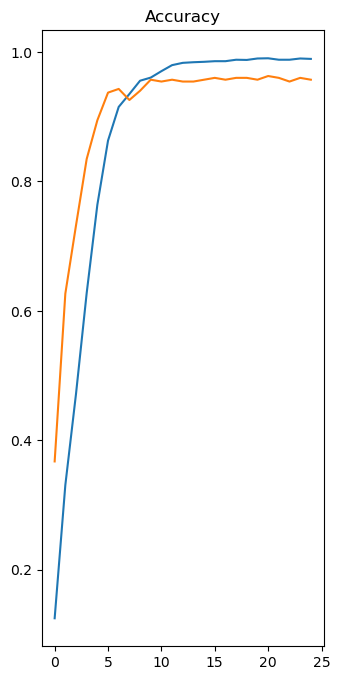

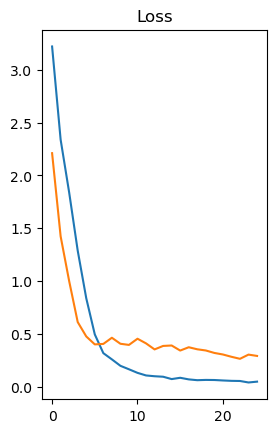

In [33]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.show()


plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation loss')
plt.title('Loss')
plt.show()

In [51]:
image = '/Users/tassnymechchahed/Desktop/Fruit Dataset/Lemon.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [52]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 26ms/step


In [53]:
score = tf.nn.softmax(predict)

In [54]:
print('The given image corresponds to {} with an accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

The given image corresponds to lemon with an accuracy of 99.89
